# Definitions

import libraries and set file/sheet names for parsing

In [82]:
import pandas
import openpyxl

FILENAME = 'excel-files/ukbusinessworkbook2021.xlsx'
SAMPLE_SHEET = 'Table 1'

# Openpyxl

load the excel file using openpyxl and inspect sheets

In [83]:
wb = openpyxl.load_workbook(FILENAME)

In [84]:
wb.sheetnames[:5]

['Notes', 'Contents', 'Table 1', 'Table 2', 'Table 3']

In [85]:
sheet = wb[SAMPLE_SHEET]
sheet

<Worksheet "Table 1">

# Header

In [86]:
from openpyxl.worksheet.worksheet import Worksheet

The table title is contained somewhere on the top row, but the cell will depend on how many columns are used for indexing

loop through top row and return 0-indexed value for first cell that has values in it

In [87]:
class SearchException(Exception):
    pass
def get_header_col(ws: Worksheet, stop_search: int = 10000) -> int:
    i = 0
    while sheet.cell(1, i+1).value is None: # cell() is indexed from 1
        i += 1
        if stop_search and i > stop_search:
            raise SearchException
    return i

In [88]:
get_header_col(sheet)

2

# Info

Want a generic function that gets information from a spreadsheet extracting its title at the top and rows/columns used for data

In [89]:
from typing import TypedDict, List

In [90]:
class SheetInfo(TypedDict):
    title: str
    subtitle: str
    title_rows: List[int]
    index_cols: List[int]

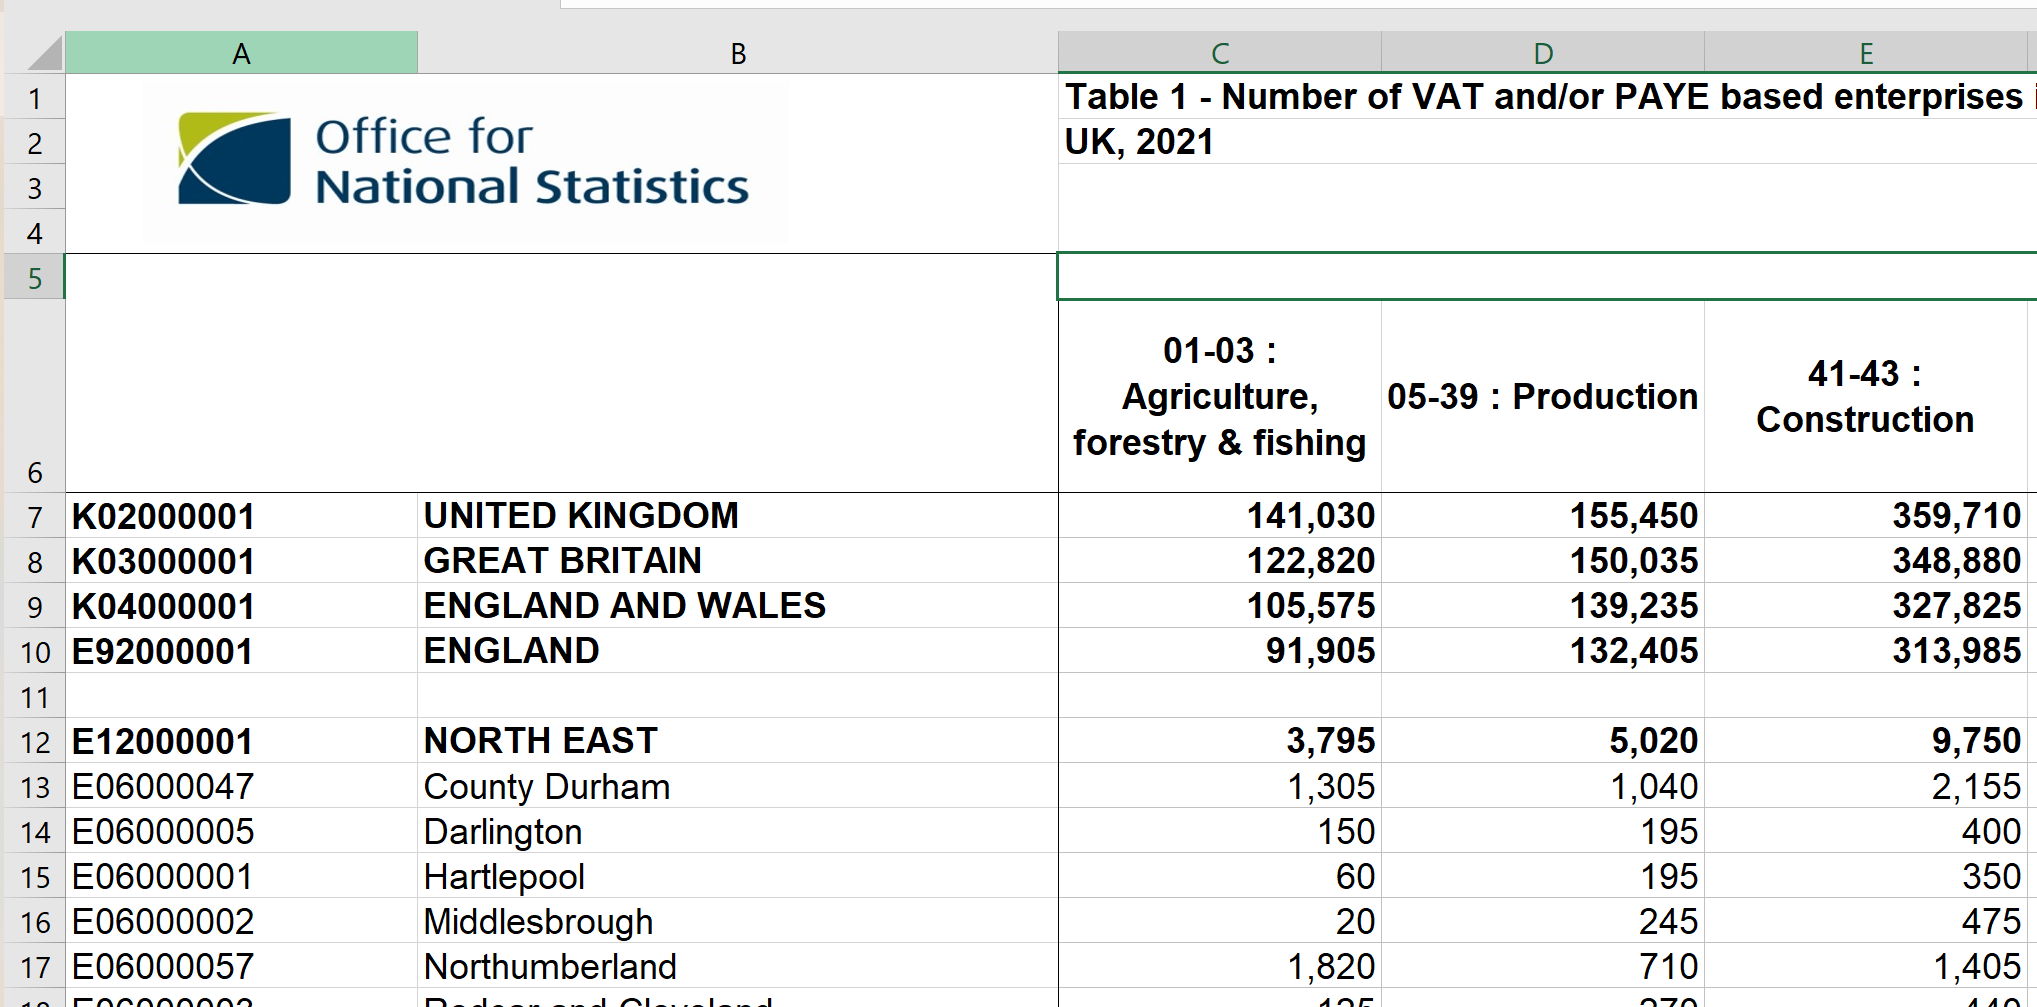

In [91]:
def get_sheet_info(ws: Worksheet) -> SheetInfo:
    header_col = get_header_col(ws)
    return {
        'title': ws.cell(1, header_col+1).value,
        'subtitle': ws.cell(2, header_col+1).value,
        'title_rows': [4, 5],
        'index_cols': list(range(header_col))
    }

In [92]:
sheet_info = get_sheet_info(sheet)
sheet_info

{'title': 'Table 1 - Number of VAT and/or PAYE based enterprises in districts, counties and unitary authorities within region and country by broad industry group',
 'subtitle': 'UK, 2021',
 'title_rows': [4, 5],
 'index_cols': [0, 1]}

# Sheet Data

Now can use pandas to gather sheets data

In [93]:
df = pandas.read_excel(
    FILENAME,
    sheet_name=SAMPLE_SHEET,
    header=sheet_info['title_rows'],
    index_col=sheet_info['index_cols']
)

In [94]:
df

Broad Industry Group  \
                                                             01-03 : Agriculture, forestry & fishing   
K02000001                              UNITED KINGDOM                                       141030.0   
K03000001                              GREAT BRITAIN                                        122820.0   
K04000001                              ENGLAND AND WALES                                    105575.0   
E92000001                              ENGLAND                                               91905.0   
                                       ENGLAND                                                   NaN   
...                                                                                              ...   
Data as at March 2021                  Newry Mourne and Down                                     NaN   
                                       Newry Mourne and Down                                     NaN   
Source: Office for National Statistics Newry Mourne and Down                                     NaN   
                                       Newry Mourne and Down                                     NaN   
Back to contents page                  Newry Mourne and Down                                     NaN   

                                                                                 \
                                                             05-39 : Production   
K02000001                              UNITED KINGDOM                  155450.0   
K03000001                              GREAT BRITAIN                   150035.0   
K04000001                              ENGLAND AND WALES               139235.0   
E92000001                              ENGLAND                         132405.0   
                                       ENGLAND                              NaN   
...                                                                         ...   
Data as at March 2021                  Newry Mourne and Down                NaN   
                                       Newry Mourne and Down                NaN   
Source: Office for National Statistics Newry Mourne and Down                NaN   
                                       Newry Mourne and Down                NaN   
Back to contents page                  Newry Mourne and Down                NaN   

                                                                                   \
                                                             41-43 : Construction   
K02000001                              UNITED KINGDOM                    359710.0   
K03000001                              GREAT BRITAIN                     348880.0   
K04000001                              ENGLAND AND WALES                 327825.0   
E92000001                              ENGLAND                           313985.0   
                                       ENGLAND                                NaN   
...                                                                           ...   
Data as at March 2021                  Newry Mourne and Down                  NaN   
                                       Newry Mourne and Down                  NaN   
Source: Office for National Statistics Newry Mourne and Down                  NaN   
                                       Newry Mourne and Down                  NaN   
Back to contents page                  Newry Mourne and Down                  NaN   

                                                                                \
                                                             45 : Motor trades   
K02000001                              UNITED KINGDOM                  78995.0   
K03000001                              GREAT BRITAIN                   76245.0   
K04000001                              ENGLAND AND WALES               71465.0   
E92000001                              ENGLAND                         67675.0   
                                       ENGLAND   

Now get rid of invalid rows with `nan`

In [95]:
df2 = df.dropna()

In [96]:
df2

Broad Industry Group  \
                                  01-03 : Agriculture, forestry & fishing   
K02000001 UNITED KINGDOM                                         141030.0   
K03000001 GREAT BRITAIN                                          122820.0   
K04000001 ENGLAND AND WALES                                      105575.0   
E92000001 ENGLAND                                                 91905.0   
E12000001 NORTH EAST                                               3795.0   
...                                                                   ...   
N09000006 Fermanagh and Omagh                                      3715.0   
N09000007 Lisburn and Castlereagh                                   630.0   
N09000008 Mid and East Antrim                                      1400.0   
N09000009 Mid Ulster                                               3260.0   
N09000010 Newry Mourne and Down                                    2345.0   

                                                                           \
                                  05-39 : Production 41-43 : Construction   
K02000001 UNITED KINGDOM                    155450.0             359710.0   
K03000001 GREAT BRITAIN                     150035.0             348880.0   
K04000001 ENGLAND AND WALES                 139235.0             327825.0   
E92000001 ENGLAND                           132405.0             313985.0   
E12000001 NORTH EAST                          5020.0               9750.0   
...                                              ...                  ...   
N09000006 Fermanagh and Omagh                  465.0               1140.0   
N09000007 Lisburn and Castlereagh              420.0                670.0   
N09000008 Mid and East Antrim                  380.0                655.0   
N09000009 Mid Ulster                           870.0               1585.0   
N09000010 Newry Mourne and Down                645.0               1630.0   

                                                                    \
                                  45 : Motor trades 46 : Wholesale   
K02000001 UNITED KINGDOM                    78995.0       106740.0   
K03000001 GREAT BRITAIN                     76245.0       103555.0   
K04000001 ENGLAND AND WALES                 71465.0        98330.0   
E92000001 ENGLAND                           67675.0        95105.0   
E12000001 NORTH EAST                         2495.0         2230.0   
...                                             ...            ...   
N09000006 Fermanagh and Omagh                 290.0          255.0   
N09000007 Lisburn and Castlereagh             220.0          340.0   
N09000008 Mid and East Antrim                 210.0          180.0   
N09000009 Mid Ulster                          350.0          340.0   
N09000010 Newry Mourne and Down               310.0          390.0   

                                               \
                                  47 : Retail   
K02000001 UNITED KINGDOM             220685.0   
K03000001 GREAT BRITAIN              214865.0   
K04000001 ENGLAND AND WALES          201270.0   
E92000001 ENGLAND                    192870.0   
E12000001 NORTH EAST                   6090.0   
...                                       ...   
N09000006 Fermanagh and Omagh           515.0   
N09000007 Lisburn and Castlereagh       340.0   
N09000008 Mid and East Antrim           365.0   
N09000009 Mid Ulster                    570.0   
N09000010 Newry Mourne and Down         670.0   

                                                                            \
                                  49-53 : Transport & Storage (inc postal)   
K02000001 UNITED KINGDOM                                          138405.0   
K03000001 GREAT BRITAIN                                           135210.0   
K04000001 ENGLAND AND WALES                                       128630.0   
E92000001 ENGLAND                                                 122760.0   
E12000001 NORTH EAST            

Now, filter out column titles if any contain "Total" (column headers are multi-level)

In [97]:
df3 = df2[[x for x in df2.columns if not any(t=='Total' for t in x)]]
df3

Broad Industry Group  \
                                  01-03 : Agriculture, forestry & fishing   
K02000001 UNITED KINGDOM                                         141030.0   
K03000001 GREAT BRITAIN                                          122820.0   
K04000001 ENGLAND AND WALES                                      105575.0   
E92000001 ENGLAND                                                 91905.0   
E12000001 NORTH EAST                                               3795.0   
...                                                                   ...   
N09000006 Fermanagh and Omagh                                      3715.0   
N09000007 Lisburn and Castlereagh                                   630.0   
N09000008 Mid and East Antrim                                      1400.0   
N09000009 Mid Ulster                                               3260.0   
N09000010 Newry Mourne and Down                                    2345.0   

                                                                           \
                                  05-39 : Production 41-43 : Construction   
K02000001 UNITED KINGDOM                    155450.0             359710.0   
K03000001 GREAT BRITAIN                     150035.0             348880.0   
K04000001 ENGLAND AND WALES                 139235.0             327825.0   
E92000001 ENGLAND                           132405.0             313985.0   
E12000001 NORTH EAST                          5020.0               9750.0   
...                                              ...                  ...   
N09000006 Fermanagh and Omagh                  465.0               1140.0   
N09000007 Lisburn and Castlereagh              420.0                670.0   
N09000008 Mid and East Antrim                  380.0                655.0   
N09000009 Mid Ulster                           870.0               1585.0   
N09000010 Newry Mourne and Down                645.0               1630.0   

                                                                    \
                                  45 : Motor trades 46 : Wholesale   
K02000001 UNITED KINGDOM                    78995.0       106740.0   
K03000001 GREAT BRITAIN                     76245.0       103555.0   
K04000001 ENGLAND AND WALES                 71465.0        98330.0   
E92000001 ENGLAND                           67675.0        95105.0   
E12000001 NORTH EAST                         2495.0         2230.0   
...                                             ...            ...   
N09000006 Fermanagh and Omagh                 290.0          255.0   
N09000007 Lisburn and Castlereagh             220.0          340.0   
N09000008 Mid and East Antrim                 210.0          180.0   
N09000009 Mid Ulster                          350.0          340.0   
N09000010 Newry Mourne and Down               310.0          390.0   

                                               \
                                  47 : Retail   
K02000001 UNITED KINGDOM             220685.0   
K03000001 GREAT BRITAIN              214865.0   
K04000001 ENGLAND AND WALES          201270.0   
E92000001 ENGLAND                    192870.0   
E12000001 NORTH EAST                   6090.0   
...                                       ...   
N09000006 Fermanagh and Omagh           515.0   
N09000007 Lisburn and Castlereagh       340.0   
N09000008 Mid and East Antrim           365.0   
N09000009 Mid Ulster                    570.0   
N09000010 Newry Mourne and Down         670.0   

                                                                            \
                                  49-53 : Transport & Storage (inc postal)   
K02000001 UNITED KINGDOM                                          138405.0   
K03000001 GREAT BRITAIN                                           135210.0   
K04000001 ENGLAND AND WALES                                       128630.0   
E92000001 ENGLAND                                                 122760.0   
E12000001 NORTH EAST            

# Regional Codes

The regional codes as the first index are all mixed in together - "districts, counties and unitary authorities within region and country"

The following below maps disctricts to regions - link used to download CSV is [here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-district-to-region-april-2021-lookup-in-england/about)

In [98]:
df_lookup = pandas.read_csv(r"excel-files/Local_Authority_District_to_Region_(April_2021)_Lookup_in_England.csv")

In [99]:
df_lookup

,FID,LAD21CD,LAD21NM,RGN21CD,RGN21NM
0,1,E06000001,Hartlepool,E12000001,North East
1,2,E06000011,East Riding of Yorkshire,E12000003,Yorkshire and The Humber
2,3,E06000002,Middlesbrough,E12000001,North East
3,4,E06000003,Redcar and Cleveland,E12000001,North East
4,5,E06000012,North East Lincolnshire,E12000003,Yorkshire and The Humber
...,...,...,...,...,...
304,305,E09000022,Lambeth,E12000007,London
305,306,E09000023,Lewisham,E12000007,London
306,307,E09000024,Merton,E12000007,London
307,308,E09000025,Newham,E12000007,London


Can see below that it is mapping "E06" through "E09" codes to "E12" codes

In [100]:
df_lookup['LAD21CD'].apply(lambda x: x[:3]).unique()

array(['E06', 'E07', 'E08', 'E09'], dtype=object)

In [101]:
df_lookup['RGN21CD'].apply(lambda x: x[:3]).unique()

array(['E12'], dtype=object)

However, **this is too broad**, the excel files goes one level deeper in that there are regions -> counties -> disctricts

Can see [from the file here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-district-to-county-april-2021-lookup-in-england/about) to map districts to counties 

In [102]:
df_lookup2 = pandas.read_csv("excel-files/Local_Authority_District_to_County_(April_2021)_Lookup_in_England.csv")

In [103]:
df_lookup2

,FID,LAD21CD,LAD21NM,CTY21CD,CTY21NM
0,1,E07000008,Cambridge,E10000003,Cambridgeshire
1,2,E07000009,East Cambridgeshire,E10000003,Cambridgeshire
2,3,E07000134,North West Leicestershire,E10000018,Leicestershire
3,4,E07000010,Fenland,E10000003,Cambridgeshire
4,5,E07000135,Oadby and Wigston,E10000018,Leicestershire
...,...,...,...,...,...
245,246,E09000024,Merton,E13000002,Outer London
246,247,E09000026,Redbridge,E13000002,Outer London
247,248,E09000027,Richmond upon Thames,E13000002,Outer London
248,249,E09000029,Sutton,E13000002,Outer London


In [104]:
df_lookup2['LAD21CD'].apply(lambda x: x[:3]).unique()

array(['E07', 'E08', 'E09'], dtype=object)

Note that normally, there is a region (E12), then a county (E10), then a district (E06/E07/E08/E09) 

- in the case below, the districts e.g. (E06000011) map **directly** to the region (E12)

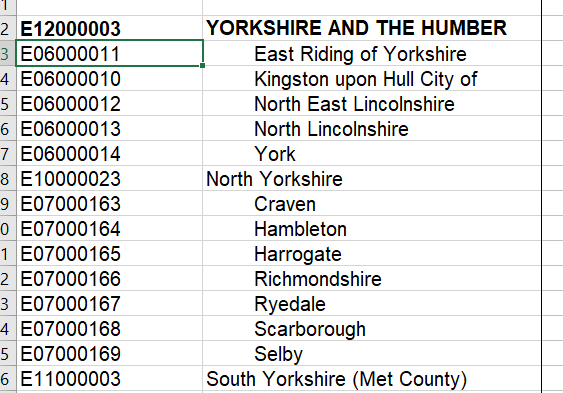

# ONS API

So it turns out the office for national statistics (ONS) have an API you can query

The ONS have a live query editor here: http://statistics.data.gov.uk/sparql

ONS use something called *sparql*, a SQL-like language for querying RDF graphs
- [Sparql tutorial](https://www.stardog.com/tutorials/sparql/)
- [RDF graphs tutorial](https://www.stardog.com/tutorials/data-model)
Basically RDF graphs is for linked data, an example is shown below
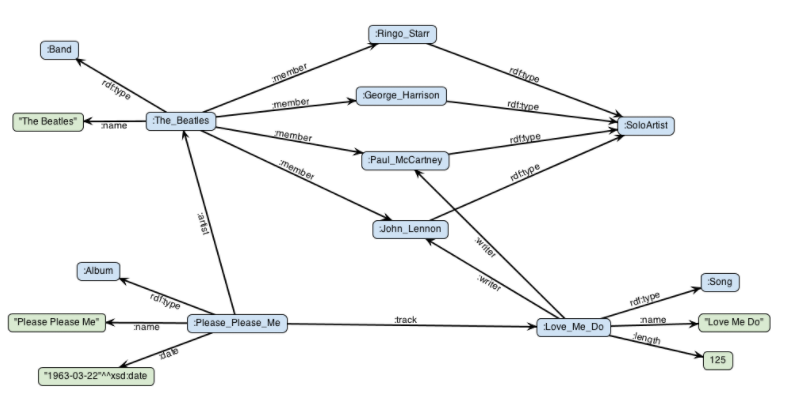

In [105]:
import rdflib
g = rdflib.Graph()

qres = g.query(
    """
    PREFIX dcat: <http://www.w3.org/ns/dcat#>
    PREFIX dcterms: <http://purl.org/dc/terms/>
    PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX qb: <http://purl.org/linked-data/cube#>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX sdmx: <http://purl.org/linked-data/sdmx/2009/concept#>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
    PREFIX void: <http://rdfs.org/ns/void#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

    SELECT *
    WHERE {
      ?s ?p ?o
    }

    LIMIT 100
    """
)

for row in qres:
    print(row.s)

Hmm that didn't work as the query returns nothing - not sure how you link it to the database

although ONS also have a JSON api which makes things alot easier -http://statistics.data.gov.uk/sparql
- the sparql query is passed as a string as the "query" key in the html post

In [106]:
import requests
import json

url = 'http://statistics.data.gov.uk/sparql.json'
data = {
    'query': 'SELECT * WHERE {?s ?p ?o} LIMIT 2'
}
r = requests.post(url, data)

print(json.dumps(json.loads(r.content.decode()), indent=2))

{
  "head": {
    "vars": [
      "s",
      "p",
      "o"
    ]
  },
  "results": {
    "bindings": [
      {
        "s": {
          "type": "uri",
          "value": "http://statistics.data.gov.uk/id/statistical-geography/E00000001"
        },
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://statistics.data.gov.uk/def/statistical-geography#Statistical-Geography"
        }
      },
      {
        "s": {
          "type": "uri",
          "value": "http://statistics.data.gov.uk/id/statistical-geography/E00000001"
        },
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/2000/01/rdf-schema#label"
        },
        "o": {
          "type": "literal",
          "value": "E00000001"
        }
      }
    ]
  }
}


Now can try query with a filter to the code "K04000001"

In [107]:
query = """
    PREFIX  sg: <http://statistics.data.gov.uk/id/statistical-geography/>
    PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
    PREFIX  idn: <http://opendatacommunities.org/id/geography/administration/md/>
    PREFIX  ew: <http://opendatacommunities.org/id/geography/administration/e&w/>
    SELECT * WHERE { 
        ew:K04000001 ?p ?o .
    } LIMIT 100
"""
url = 'http://opendatacommunities.org/sparql.json'
r = requests.post(url, {'query': query})
print(json.dumps(json.loads(r.content.decode()), indent=2))

{
  "head": {
    "vars": [
      "p",
      "o"
    ]
  },
  "results": {
    "bindings": [
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/1999/02/22-rdf-syntax-ns#type"
        },
        "o": {
          "type": "uri",
          "value": "http://opendatacommunities.org/def/ontology/admingeo/Country"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/2000/01/rdf-schema#label"
        },
        "o": {
          "xml:lang": "en",
          "type": "literal",
          "value": "England and Wales K04000001"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/2004/02/skos/core#note"
        },
        "o": {
          "type": "literal",
          "value": "Live"
        }
      },
      {
        "p": {
          "type": "uri",
          "value": "http://www.w3.org/2004/02/skos/core#notation"
        },
        "o": {
          "type": "litera

# Gov Statistics vs Open Data Community sites

In the example below from the business activity spreadsheet, *Gateshead* is a child of *Tyne and Wear*

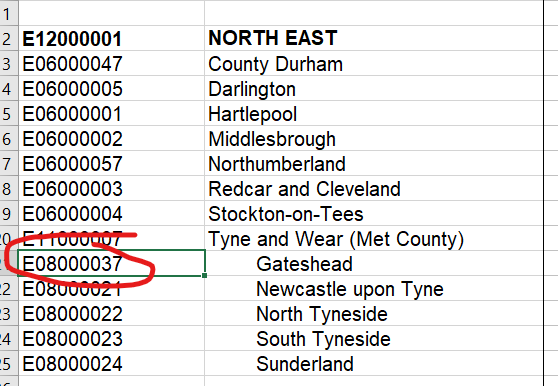

In the statistics.gov website below, the parent is reported as the region E12000001 **and not the county** E11000007?

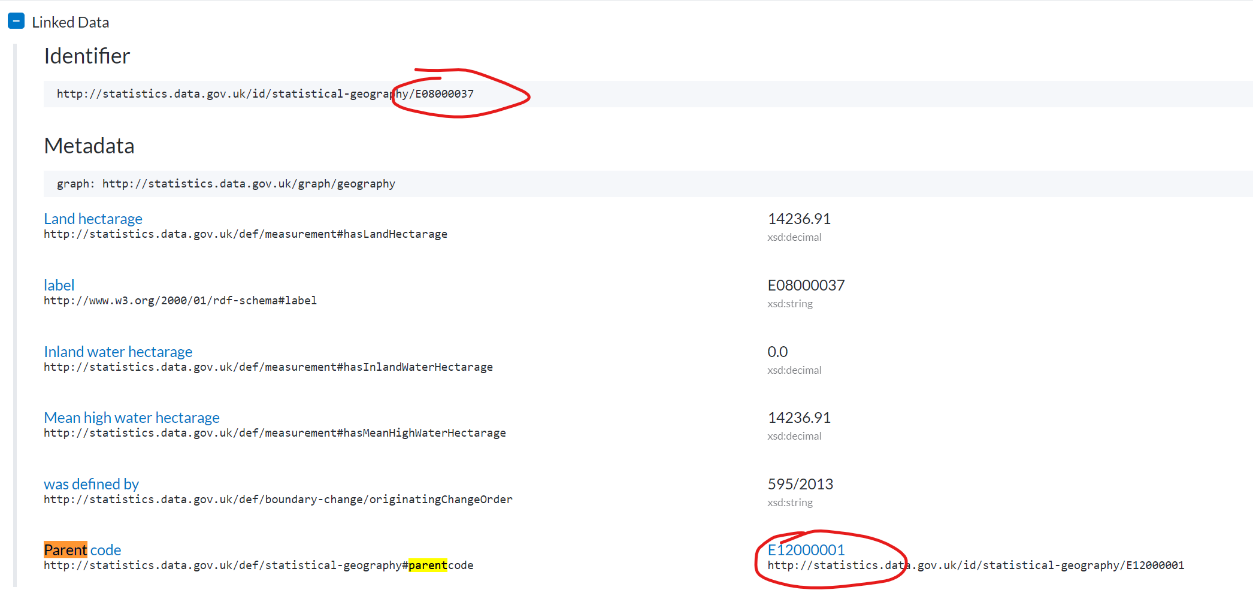

However, on the opencommunities website the parent is correctly listed as the county E11000007?
- thus, from now on going to use the **open communities website**

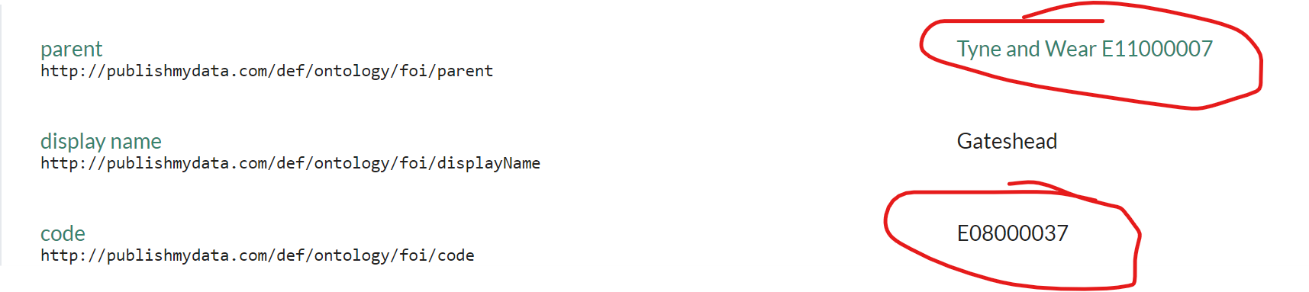

# Building queries

In open data communities different level of codes have different prefixes in the IRI, for example
- for the uk the prefix is "uk/": "http://opendatacommunities.org/id/geography/administration/uk/K02000001"
- for the gateshead region the prefix is "md/": "http://opendatacommunities.org/id/geography/administration/md/E08000037"

Thus, need to filter to the node with the "code" stored as a string, and from there detect the IRI

In [108]:
query = """
    PREFIX  sg: <http://statistics.data.gov.uk/id/statistical-geography/>
    PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
    PREFIX  idn: <http://opendatacommunities.org/id/geography/administration/md/>
    PREFIX  ew: <http://opendatacommunities.org/id/geography/administration/e&w/>
    SELECT * WHERE { 
        ?c foi:code "K02000001" .
    } LIMIT 100
"""
url = 'http://opendatacommunities.org/sparql.json'
r = requests.post(url, {'query': query})
print(json.dumps(json.loads(r.content.decode()), indent=2))

{
  "head": {
    "vars": [
      "c"
    ]
  },
  "results": {
    "bindings": [
      {
        "c": {
          "type": "uri",
          "value": "http://opendatacommunities.org/id/geography/administration/uk/K02000001"
        }
      }
    ]
  }
}


Code below defines and calls a function which takes an ONS code and gets the URI from open data communities

In [141]:
class SparqlException(Exception):
    pass

def get_uri(code: str) -> str:
    query = f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            ?c foi:code "{code}" .
        }} LIMIT 100
    """
    url = 'http://opendatacommunities.org/sparql.json'
    r = requests.post(url, {'query': query})
    data = json.loads(r.content.decode())
    for b in data["results"]["bindings"]:
        if b["c"]["type"] == "uri":
            return b["c"]["value"]
    raise SparqlException(f'no "uri" type found in bindings for code "{code}"')
get_uri("K02000001")

'http://opendatacommunities.org/id/geography/administration/uk/K02000001'

Taking a sample URI for area code "E07000026", get the response trying to obtain its parent URI

In [110]:
uri = 'http://opendatacommunities.org/id/geography/administration/nmd/E07000026'
query = f"""
    PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
    SELECT * WHERE {{ 
        <{uri}> foi:parent ?c .
    }} LIMIT 100
"""
url = 'http://opendatacommunities.org/sparql.json'
r = requests.post(url, {'query': query})
print(json.dumps(json.loads(r.content.decode()), indent=2))

{
  "head": {
    "vars": [
      "c"
    ]
  },
  "results": {
    "bindings": [
      {
        "c": {
          "type": "uri",
          "value": "http://opendatacommunities.org/id/geography/administration/cty/E10000006"
        }
      }
    ]
  }
}


Create function to extract code parent

In [111]:
type(r)

requests.models.Response

In [125]:
from typing import Optional
from requests.models import Response

def extract_value(response: Response, var_name: str, conn_type: str) -> any:
    data = json.loads(response.content.decode())
    for b in data["results"]["bindings"]:
        if b[var_name]["type"] == conn_type:
            return b[var_name]["value"]
    raise SparqlException(f'no "{conn_type}" type found in bindings')

def get_parent(uri: str) -> Optional[str]:
    # URI must be encapsulated in <> angular brackets for sparql to function
    query = f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            <{uri}> foi:parent ?c .
        }} LIMIT 100
    """
    url = 'http://opendatacommunities.org/sparql.json'
    r = requests.post(url, {'query': query})
    try:
        return extract_value(r, "c", "uri")
    except SparqlException:
        return None
    
get_parent('http://opendatacommunities.org/id/geography/administration/cty/E10000006')

'http://opendatacommunities.org/id/geography/administration/rgn/E12000002'

Now, can apply function to dataframe first index column of geographical codes and get URI

In [143]:
for r in df3.index[:5]:
    try:
        print(get_uri(r[0]))
    except SparqlException as e:
        print(e)
        break

http://opendatacommunities.org/id/geography/administration/uk/K02000001
http://opendatacommunities.org/id/geography/administration/gb/K03000001
no "uri" type found in bindings for code "K04000001"


So it would seem that some codes dont exist in the opendatacommunities site, so can try gov statistics site as well as a backup

In [161]:
URLS = [
    'http://opendatacommunities.org/sparql.json',
    'http://statistics.data.gov.uk/sparql.json'
]

def extract_value(response: Response, var_name: str, conn_type: str) -> any:
    data = json.loads(response.content.decode())
    for b in data["results"]["bindings"]:
        if b[var_name]["type"] == conn_type:
            return b[var_name]["value"]
    return None

# def try_urls(code: str, query: str, var_name: str, conn_type: str) -> any:
#     for url in URLS:
#         response = requests.post(url, {'query': query})
#         result = extract_value(response, var_name, conn_type)
#         if result is not None:
#             if type(result) is not str:
#                 raise SparqlException(f'code "{code}", expected string, got {type(result)}')
#             return result
#     return None
        
def get_uri(code: str) -> str:
    query = f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            ?c foi:code "{code}" .
        }} LIMIT 100
    """
    result = None
    for url in URLS:
        response = requests.post(url, {'query': query})
        result = extract_value(response, "c", "uri")
        if result is not None:
            if type(result) is not str:
                raise SparqlException(f'code "{code}", expected string, got {type(result)}')
            return result
        
    raise SparqlException(f'no "uri" type found in bindings for code "{code}"')

def get_parent(uri: str) -> Optional[str]:
    # URI must be encapsulated in <> angular brackets for sparql to function
    query = f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            <{uri}> foi:parent ?c .
        }} LIMIT 100
    """
    result = None
    for url in URLS:
        response = requests.post(url, {'query': query})
        result = extract_value(response, "c", "uri")
        if result is not None:
            if type(result) is not str:
                raise SparqlException(f'expected string, got {type(result)}')
            return result
    raise SparqlException(f'no "uri" type found in bindings for uri "{uri}"')
   
    

In [162]:
get_parent(get_uri('K03000001'))

'http://opendatacommunities.org/id/geography/administration/uk/K02000001'

In [164]:
for r in df3.index:
    try:
        uri = get_uri(r[0])
        print(uri)
        parent = get_parent(uri)
        print(parent)
    except SparqlException as e:
        print(e)

http://opendatacommunities.org/id/geography/administration/uk/K02000001
no "uri" type found in bindings for uri "http://opendatacommunities.org/id/geography/administration/uk/K02000001"
http://opendatacommunities.org/id/geography/administration/gb/K03000001
http://opendatacommunities.org/id/geography/administration/uk/K02000001
http://statistics.data.gov.uk/id/statistical-geography/K04000001
no "uri" type found in bindings for uri "http://statistics.data.gov.uk/id/statistical-geography/K04000001"
http://opendatacommunities.org/id/geography/administration/ctry/E92000001
http://opendatacommunities.org/id/geography/administration/gb/K03000001
http://opendatacommunities.org/id/geography/administration/rgn/E12000001
http://opendatacommunities.org/id/geography/administration/ctry/E92000001
http://opendatacommunities.org/id/geography/administration/ua/E06000047
http://opendatacommunities.org/id/geography/administration/rgn/E12000001
http://opendatacommunities.org/id/geography/administration/u

So the northern ireland "parent" lookups dont work, apparently they have their own website for linked geography data 

can see an example here: http://linked.nisra.gov.uk/atlas/resource?uri=http%3A%2F%2Fstatistics.data.gov.uk%2Fid%2Fstatistical-geography%2FN09000010&inactive=false

The sparql site is here: http://linked.nisra.gov.uk/sparql

In [183]:
URLS = [
    'http://opendatacommunities.org/sparql.json',
    'http://statistics.data.gov.uk/sparql.json',
    'http://linked.nisra.gov.uk/sparql.json'
]

In [202]:
from typing import Optional, Dict

def extract_value(response: Response, var_name: str, conn_type: str) -> any:
    """
    parse an html response to JSON and extract sparql query response data, return None if not found
    """
    if not response.content:
        return None
    data = json.loads(response.content.decode())
    for b in data["results"]["bindings"]:
        if b[var_name]["type"] == conn_type:
            return b[var_name]["value"]
    return None

def generate_uri_query(code: str) -> str:
    """
    generate query that matches an RDF predicate of a geographical code type and an RDF object of the code passed as a parameter
    query provides result in the "c" variable to match a URI from the string code passed to the function
    """
    return f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            ?c foi:code "{code}" .
        }} LIMIT 100
    """

def generate_parent_query(uri: str) -> str:
    """
    generate a query to capture the parent URI from an existing URI in the variable "c"
    """
    
    # URI must be encapsulated in <> angular brackets for sparql to function
    return f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            <{uri}> foi:parent ?c .
        }} LIMIT 100
    """

def generate_code_query(uri: str) -> str:
    """
    generate a query to capture the string code from a URI into a variable "c"
    """
    return f"""
        PREFIX  foi: <http://publishmydata.com/def/ontology/foi/>
        SELECT * WHERE {{ 
            <{uri}> foi:code ?c .
        }} LIMIT 100
    """
    

def execute_sparql(url: str, query: str) -> Response:
    """execute a sparql query"""
    return requests.post(url, {'query': query})


def get_info(code: str) -> Optional[Dict]:
    for url in URLS:
        query = generate_uri_query(code)
        response = execute_sparql(url, query)
        uri = extract_value(response, "c", "uri")
        if uri is not None:
            parent_query = generate_parent_query(uri)
            response = execute_sparql(url, parent_query)
            parent_uri = extract_value(response, "c", "uri")
            if parent_uri is not None:
                return {
                    'uri': uri,
                    'parent_uri': parent_uri
                }
    return None
    

In [185]:
for r in df3.index:
    code = r[0]
    info = get_info(code)
    if info is not None:
        print(f'code: "{code}"')
        print(f'uri: "{info["uri"]}"')
        print(f'parent uri: "{info["parent_uri"]}"')
    else:
        print(f'could not find parent info for "{code}"')

code: "E10000025"
uri: "http://opendatacommunities.org/id/geography/administration/cty/E10000025"
parent uri: "http://opendatacommunities.org/id/geography/administration/rgn/E12000008"
code: "E07000177"
uri: "http://opendatacommunities.org/id/geography/administration/nmd/E07000177"
parent uri: "http://opendatacommunities.org/id/geography/administration/cty/E10000025"
code: "E07000178"
uri: "http://opendatacommunities.org/id/geography/administration/nmd/E07000178"
parent uri: "http://opendatacommunities.org/id/geography/administration/cty/E10000025"
code: "E07000179"
uri: "http://opendatacommunities.org/id/geography/administration/nmd/E07000179"
parent uri: "http://opendatacommunities.org/id/geography/administration/cty/E10000025"
code: "E07000180"
uri: "http://opendatacommunities.org/id/geography/administration/nmd/E07000180"
parent uri: "http://opendatacommunities.org/id/geography/administration/cty/E10000025"
code: "E07000181"
uri: "http://opendatacommunities.org/id/geography/adminis

Adding in scotland as well... http://statistics.gov.scot/sparql

In [198]:
URLS = [
    'http://opendatacommunities.org/sparql.json',
    'http://statistics.data.gov.uk/sparql.json',
    'http://linked.nisra.gov.uk/sparql.json',
    'http://statistics.gov.scot/sparql.json'
]

Now running for all indexes, it should work for all except
- UK as the top of the tree has no parent
- England & Wales K04000001 doesn't have a parent, doesnt appear to work

In [201]:
for r in df3.index:
    code = r[0]
    info = get_info(code)
    if info is not None:
        print(f'code: "{code}"')
        print(f'uri: "{info["uri"]}"')
        print(f'parent uri: "{info["parent_uri"]}"')
    else:
        print(f'could not find parent info for "{code}"')

could not find parent info for "K02000001"
code: "K03000001"
uri: "http://opendatacommunities.org/id/geography/administration/gb/K03000001"
parent uri: "http://opendatacommunities.org/id/geography/administration/uk/K02000001"
could not find parent info for "K04000001"
code: "E92000001"
uri: "http://opendatacommunities.org/id/geography/administration/ctry/E92000001"
parent uri: "http://opendatacommunities.org/id/geography/administration/gb/K03000001"
code: "E12000001"
uri: "http://opendatacommunities.org/id/geography/administration/rgn/E12000001"
parent uri: "http://opendatacommunities.org/id/geography/administration/ctry/E92000001"
code: "E06000047"
uri: "http://opendatacommunities.org/id/geography/administration/ua/E06000047"
parent uri: "http://opendatacommunities.org/id/geography/administration/rgn/E12000001"
code: "E06000005"
uri: "http://opendatacommunities.org/id/geography/administration/ua/E06000005"
parent uri: "http://opendatacommunities.org/id/geography/administration/rgn/E12

Now, can test out getting the parent string code once we have its URI

In [204]:
sample_code = "E92000001"
sample_url = "http://opendatacommunities.org/sparql.json"
q = generate_code_query("http://opendatacommunities.org/id/geography/administration/ctry/E92000001")
response = execute_sparql(sample_url, q)
response.content

b'{"head":{"vars":["c"]},"results":{"bindings":[{"c":{"type":"literal","value":"E92000001"}}]}}'

In [205]:
extract_value(response, "c", "literal")

'E92000001'

Update info retriever function to get parent code as well

In [210]:
def get_info(code: str, require_parent=True) -> Optional[Dict]:
    for url in URLS:
        query = generate_uri_query(code)
        response = execute_sparql(url, query)
        uri = extract_value(response, "c", "uri")
        if uri is None:
            continue
        
        if not require_parent:
            return {'uri': uri}
        
        parent_query = generate_parent_query(uri)
        response = execute_sparql(url, parent_query)
        parent_uri = extract_value(response, "c", "uri")
        if parent_uri is None:
            continue
            
        code_query = generate_code_query(parent_uri)
        response = execute_sparql(url, code_query)
        parent_code = extract_value(response, "c", "literal")
        
        if parent_code is None:
            continue
        
        return {
            'uri': uri,
            'parent_uri': parent_uri,
            'parent_code': parent_code
        }
    return {}

In [211]:
top_code = 'K02000001'
infos = [get_info(i[0], require_parent=i[0]!=top_code) for i in df3.index]

In [216]:
pandas.set_option("display.max_rows", None)

In [217]:
df4 = pandas.DataFrame(infos, index=df3.index)
df4

,,uri,parent_uri,parent_code
K02000001,UNITED KINGDOM,http://opendatacommunities.org/id/geography/ad...,NaN,NaN
K03000001,GREAT BRITAIN,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,K02000001
K04000001,ENGLAND AND WALES,NaN,NaN,NaN
E92000001,ENGLAND,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,K03000001
E12000001,NORTH EAST,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,E92000001
E06000047,County Durham,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,E12000001
E06000005,Darlington,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,E12000001
E06000001,Hartlepool,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,E12000001
E06000002,Middlesbrough,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,E12000001
E06000057,Northumberland,http://opendatacommunities.org/id/geography/ad...,http://opendatacommunities.org/id/geography/ad...,E12000001


In [215]:
df4.to_excel('code_lookups.xlsx')